### Your name:

<pre> Isaac Aktam</pre>

### Collaborators:

<pre> Ashish Gupta, Konrad Kornzeniewski</pre>


In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {3, 4, 6, 7, 10, 20, 50, 100} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 4, 5, 7, 10, 20, 50} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 4-folds.

- Other paramenters -> Use default

Notes:
  - Make your code modular, the second part of the assignmet you will have to repeat. 
  - Include documentation for your code 

In [2]:
### Your code here

# Explanation of the data 

"""
Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of 
probability of default among six data mining methods. From the perspective of risk management, the result of 
predictive accuracy of the estimated probability of default will be more valuable than the binary result of 
classification - credible or not credible clients. Because the real probability of default is unknown, this study 
presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real 
probability of default as the response variable (Y), and the predictive probability of default as the independent 
variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by 
artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to 
zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural 
network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her 
family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 
"""

## Feel free to use multiple cells

credit = pd.read_excel("/home/isaac/Fundamentals of Data Science Certificate/3253 - Machine Learning/Assignments/default of credit card clients.xls", 
                   sheet = 0, skiprows= 1, header = 0)

In [3]:
# Remove the ID Column as we don't need it for any analysis

credit = credit.drop('ID', axis=1)

print(credit.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0     -2             ...                      0          0          0   
1      0             ...                   3272       3455       3261   
2      0             ...                  14331      14948      15549   
3      0             ...                  28314      28959      29547   
4      0             ...                  20940      19146      19131   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0         0       689         0         0    

In [4]:
# Step 1, explore data

credit.info()

# As we can see from the output, there are no missing values. Additionally, all attributes are numerical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [5]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<function matplotlib.pyplot.show>

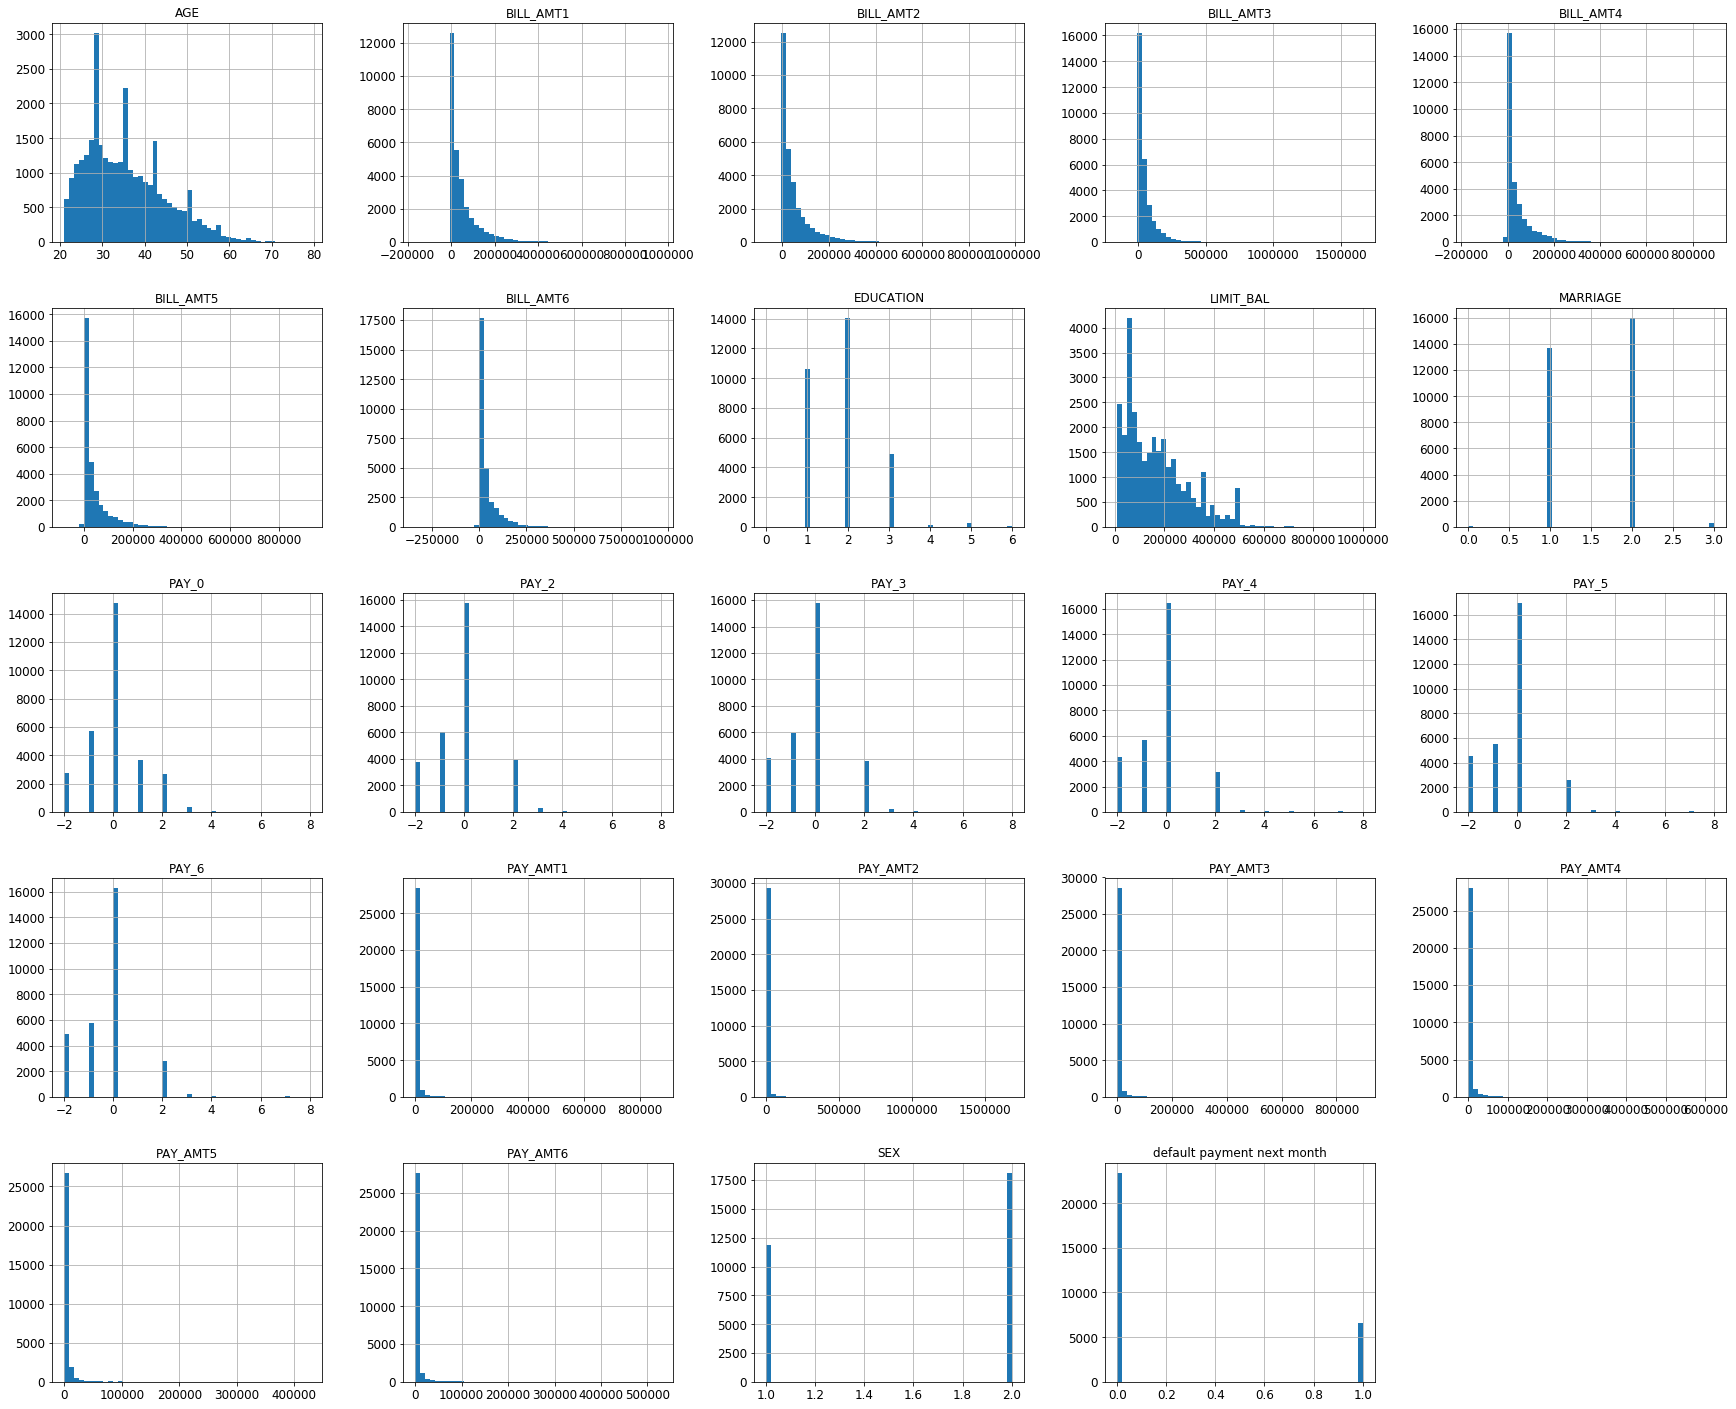

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
credit.hist(bins = 50, figsize = (30, 25))
plt.show

# Comments in regards to graphs below:

# Many histograms, such as Age, Bill_Amti, and Limit_Bal, are tail heavy.
# These attributes have very different scales

<function matplotlib.pyplot.show>

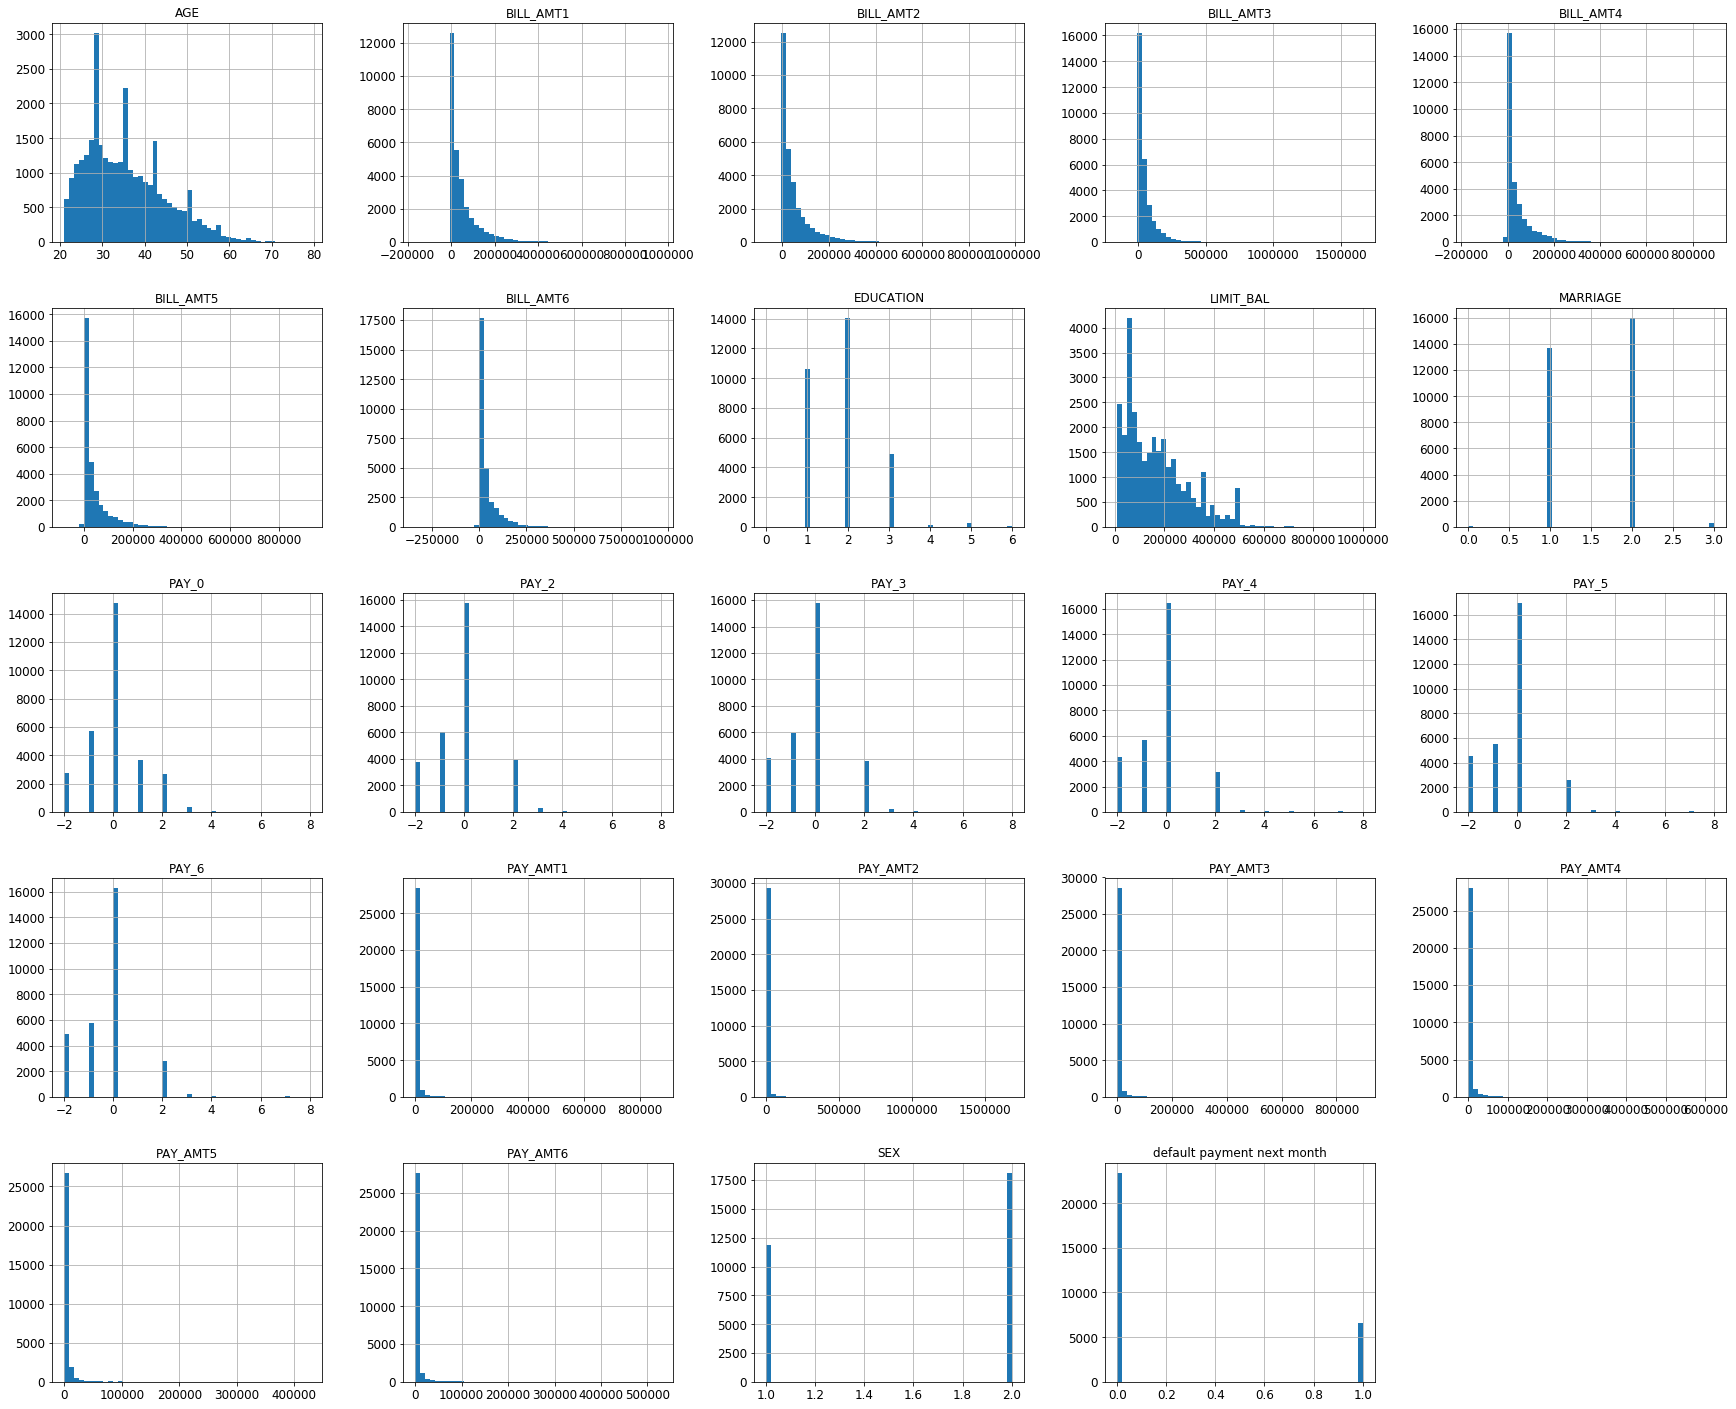

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
credit.hist(bins = 50, figsize = (30, 25))
plt.show

In [8]:
# Stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 123)
for train_index, test_index in split.split(credit, credit["default payment next month"]):
    strat_train_set = credit.loc[train_index]
    strat_test_set = credit.loc[test_index]

In [9]:
# Let's see if this worked as expected. Let's look at the "default payment next month" proportions in full credit
# dataset

print(credit["default payment next month"].value_counts() / len(credit))
print(strat_train_set["default payment next month"].value_counts() / len(strat_train_set))
print(strat_test_set["default payment next month"].value_counts() / len(strat_test_set))

# Proportions are the same, therefore it all works.

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64
0    0.778792
1    0.221208
Name: default payment next month, dtype: float64
0    0.778833
1    0.221167
Name: default payment next month, dtype: float64


In [10]:
# Look at correlations

# Let's create a copy so we can play with it without harming the training set 
credit = strat_train_set.copy()

corr_matrix = credit.corr()
corr_matrix["default payment next month"].sort_values(ascending = False)

default payment next month    1.000000
PAY_0                         0.324014
PAY_2                         0.266452
PAY_3                         0.237056
PAY_4                         0.217085
PAY_5                         0.204356
PAY_6                         0.186657
EDUCATION                     0.026733
AGE                           0.010063
BILL_AMT6                    -0.001505
BILL_AMT5                    -0.003977
BILL_AMT4                    -0.005963
BILL_AMT3                    -0.009540
BILL_AMT2                    -0.010074
BILL_AMT1                    -0.015972
MARRIAGE                     -0.020547
SEX                          -0.040092
PAY_AMT6                     -0.052558
PAY_AMT5                     -0.054261
PAY_AMT4                     -0.055351
PAY_AMT3                     -0.055511
PAY_AMT2                     -0.056455
PAY_AMT1                     -0.071530
LIMIT_BAL                    -0.150979
Name: default payment next month, dtype: float64

/home/isaac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8b347f208>,
      dtype=object)

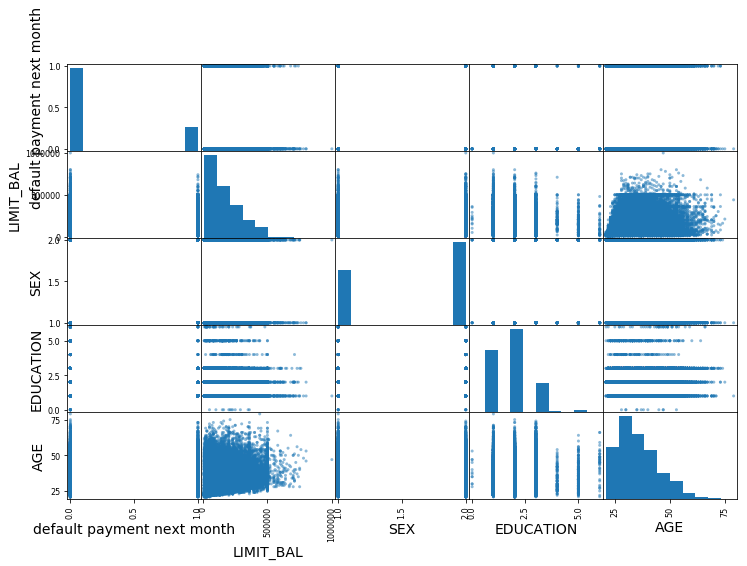

In [11]:
# Build correlation graphs

from pandas.tools.plotting import scatter_matrix
attributes = ["default payment next month", "LIMIT_BAL", "SEX", "EDUCATION", "AGE"]
scatter_matrix(credit[attributes], figsize=(12, 8))


In [12]:
credit.shape

(24000, 24)

In [13]:
# Now, let's revert to a clean data set (by copying strat_train_set once again), and let's separate predictors and 
# let's separate the predictors adn the labels since we don't necessarily want to apply the same transformations
# to the predictors and the target values (note that drop() creates a copy of the data and does not affect
# strat_train_set)

credit = strat_train_set.drop("default payment next month", axis = 1)
credit_labels = strat_train_set["default payment next month"].copy()


In [14]:
credit.shape

(24000, 23)

In [15]:
# Step 2, Data Cleaning

# Standardization of non-categorical data only, so, do not clean such data as Bill_Amt_i, education, Pay, Sex

credit_num = credit.drop(["MARRIAGE", "SEX", "EDUCATION", "PAY_0", "PAY_2", "PAY_3", 
                          "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                         "BILL_AMT5", "BILL_AMT6"], axis = 1)


# DO NOT DELETE
#dropped_attributes = credit[["MARRIAGE", "SEX", "EDUCATION", "PAY_0", "PAY_2", "PAY_3", "PAY_4", 
#                                  "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", 
#                                  "BILL_AMT5", "BILL_AMT6"]].copy()

cat_attribs = ["MARRIAGE", "SEX", "EDUCATION", "PAY_0", "PAY_2", "PAY_3", "PAY_4", 
                                  "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", 
                                  "BILL_AMT5", "BILL_AMT6"]


from sklearn.pipeline import Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

# There is nothing in Scikit-Learn to handle Pandas DataFrames, so we need to write a custom transformer for this
# task

# DataFrameSelector is correct

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

# FROM HERE

num_attribs = list(credit_num)
#dropped_attributes = list(dropped_attributes)

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('std_scaler', StandardScaler())])


cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs))])

full_pipeline = FeatureUnion([("num_pipeline", num_pipeline), 
                              ("cat_pipeline", cat_pipeline)])



credit_prepared = full_pipeline.fit_transform(credit)
credit_prepared
# TO HERE

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-6.73150462e-01,  1.57181814e+00, -3.47656983e-01, ...,
         4.24700000e+03,  3.91400000e+03,  3.24200000e+03],
       [ 2.55647432e+00,  8.13599834e-01, -6.58491634e-02, ...,
         1.29863000e+05,  1.20781000e+05,  9.81630000e+04],
       [-8.26942119e-01, -4.86202975e-01, -2.92122270e-01, ...,
         4.11000000e+02,  2.61000000e+02,  6.69500000e+03],
       ...,
       [ 2.55647432e+00,  7.05282933e-01, -2.33872525e-01, ...,
         6.14000000e+02,  2.88700000e+03,  3.85000000e+03],
       [-9.03837947e-01, -5.94519876e-01, -2.55777885e-01, ...,
         1.89480000e+04,  1.88300000e+04,  1.93580000e+04],
       [ 2.55647432e+00, -2.69569174e-01,  8.02590350e-01, ...,
         5.00580000e+04,  3.50360000e+04,  4.75700000e+03]])

In [16]:
# Step 3, First fit the model on RandomForest and the KNNClassifier

# Random Forest

from sklearn.ensemble import RandomForestClassifier

rand_forest_reg = RandomForestClassifier()
rand_forest_reg.fit(credit_prepared, credit_labels)

# Now that the model is prepared, let's evaluate it on the training set

credit_predict_rand_forest = rand_forest_reg.predict(credit_prepared)

# Next, get the scores

from sklearn.model_selection import cross_val_predict

# This gives us the continuous predictions
credit_labels_probas_forest = cross_val_predict(rand_forest_reg, credit_prepared, credit_labels, cv = 4,
                                        method = "predict_proba") # Basically, y_probas_forest

# But, to plot ROC curve, you need scores, not probabilities. A simple solution is to use the positive class's
# probability as the score

credit_scores_forest = credit_labels_probas_forest[:, 1] # score = proba of positive class
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(credit_labels, credit_scores_forest)

###################################

# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_reg = KNeighborsClassifier()
knn_reg.fit(credit_prepared, credit_labels)

# Now that the model is prepared, let's evaluate it on the training set

credit_predict_knn = knn_reg.predict(credit_prepared)

# Next, get the scores

from sklearn.model_selection import cross_val_predict

# This gives us the continuous predictions
credit_labels_probas_neigh = cross_val_predict(knn_reg, credit_prepared, credit_labels, cv = 4,
                                        method = "predict_proba") # Basically, y_probas_neigh

# But, to plot ROC curve, you need scores, not probabilities. A simple solution is to use the positive class's
# probability as the score

credit_scores_neigh = credit_labels_probas_neigh[:, 1] # score = proba of positive class
#fpr_forest, tpr_forest, thresholds_neigh = roc_curve(credit_labels, credit_labels_probas_neigh)

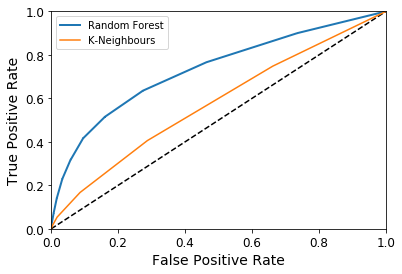

In [17]:
# Step 4, Create ROC and choose the threshold

from sklearn.metrics import roc_curve

# Random Forest

fpr_forest, tpr_forest, thresholds_forest = roc_curve(credit_labels, credit_scores_forest)

# KNN

fpr_neigh, tpr_neigh, thresholds_neigh = roc_curve(credit_labels, credit_scores_neigh)

# Define the plot_roc_curve function

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Now we are ready to plot the ROC curve

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr_neigh, tpr_neigh, label = "K-Neighbours")
plt.legend(loc = "upper left")
plt.show()

In [18]:
# Step 5, calculaute the AUC and choose the best model

from sklearn.metrics import roc_auc_score

roc_auc_rand_forest = roc_auc_score(credit_labels, credit_scores_forest)

roc_auc_knn = roc_auc_score(credit_labels, credit_scores_neigh)

print(roc_auc_rand_forest) # 0.7310755978208681

print(roc_auc_knn) # 0.5772929898713923

# Therefore, choose the Random Forest Regressor since it has the highest AUC

0.7310755978208681
0.5772929898713923


In [19]:
# Get the confusion matrix

from sklearn.metrics import confusion_matrix

# Random Forest

# Need to get binary predictions
credit_labels_train_pred_forest = cross_val_predict(rand_forest_reg, credit_prepared, credit_labels, cv = 4)

#print(confusion_matrix(credit_labels, credit_labels_probas_forest))

print(confusion_matrix(credit_labels, credit_labels_train_pred_forest))

"""
confusion_matrix(credit_labels, credit_labels_train_pred_forest)
[[17613  1078]
 [ 3588  1721]]
"""

# print(confusion_matrix(credit_labels, credit_labels_probas_forest))
#[[18597    94]
# [  599  4710]]

#########################################

# KNN

# Need to get binary predictions

credit_labels_train_pred_forest_neigh = cross_val_predict(knn_reg, credit_prepared, credit_labels, cv = 4)

print(confusion_matrix(credit_labels, credit_labels_train_pred_forest_neigh))

# print(confusion_matrix(credit_labels, credit_labels_probas_neigh))
# [[17912   779]
#  [ 3725  1584]]

"""
print(confusion_matrix(credit_labels, credit_labels_train_pred_forest_neigh))
[[17148  1543]
 [ 3511  1798]]
"""

[[17612  1079]
 [ 3586  1723]]
[[17080  1611]
 [ 4422   887]]


'\nprint(confusion_matrix(credit_labels, credit_labels_train_pred_forest_neigh))\n[[17148  1543]\n [ 3511  1798]]\n'

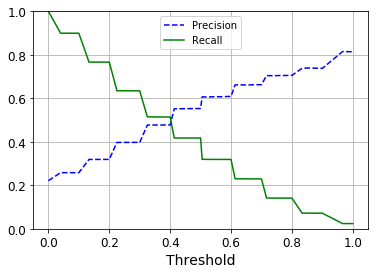

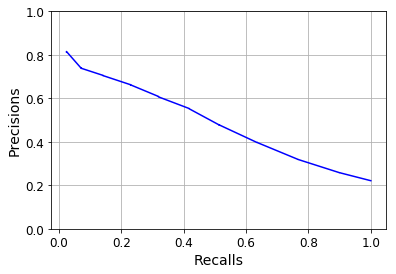

In [20]:
# Look at the Precision Recall curve

# Choose a threshold

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(credit_labels, credit_scores_forest)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper center")
    plt.ylim([0, 1])
    plt.grid(True)

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


# Let's print precision vs recall


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b")
    plt.xlabel("Recalls")
    plt.ylabel("Precisions")
    plt.ylim([0, 1])
    plt.grid(True)
    
plot_precision_vs_recall(precisions, recalls)
plt.show()


In [21]:
# Let's choose Recall of 76% 

credit_train_pred_thres = (credit_scores_forest > 0.11)

from sklearn.metrics import precision_score, recall_score

print(precision_score(credit_labels, credit_train_pred_thres))

print(recall_score(credit_labels, credit_train_pred_thres))

0.31896551724137934
0.7666227161423997


In [22]:
# Get predictions scores (aka accuracy scores)

from sklearn.model_selection import cross_val_score

forest_cross_val_score = cross_val_score(rand_forest_reg, credit_prepared, credit_train_pred_thres, cv = 4, scoring = "accuracy")

#neigh_cross_val_score = cross_val_score(knn_reg, credit_prepared, credit_labels, cv = 4, scoring = "accuracy")

print(forest_cross_val_score) # [0.71471421 0.73116667 0.7155     0.71578596]

print(np.average(forest_cross_val_score)) # Actual accuracy for the training set; 0.7192917113229179
#print(forest_cross_val_score)

[0.7185     0.72166667 0.70833333 0.707     ]
0.713875


In [23]:
# Step 6, run grid search for the RandomForestClassifier

credit_train_pred_thres = credit_train_pred_thres.astype(int)

from sklearn.model_selection import GridSearchCV

n_estimators = [3, 4, 6, 7, 10, 20, 50, 100]

param_grid_forest = {'n_estimators' : n_estimators}

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid_forest, cv = 4, scoring='neg_mean_squared_error', refit = True)

grid_search.fit(credit_prepared, credit_train_pred_thres)

forest_best_params_ = grid_search.best_params_

forest_best_estimators_ = grid_search.best_estimator_

print(forest_best_params_)

print(forest_best_estimators_)

# Best model is the following
"""
{'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
"""

{'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


"\n{'n_estimators': 100}\nRandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=None, max_features='auto', max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=2,\n            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,\n            oob_score=False, random_state=None, verbose=0,\n            warm_start=False)\n"

In [24]:
# Step 7, test the model

# Do we need to drop categorical data on test set?

final_model = grid_search.best_estimator_

credit_X_test = strat_test_set.drop("default payment next month", axis = 1)
credit_y_test = strat_test_set["default payment next month"].copy()

credit_X_test_prepared = full_pipeline.transform(credit_X_test)

final_predictions = final_model.predict(credit_X_test_prepared)

final_predictions

/home/isaac/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([1, 0, 1, ..., 0, 1, 0])

In [25]:
credit_X_test.shape

(6000, 23)

In [26]:
# Check the model accuracy

from sklearn.metrics import accuracy_score

print(accuracy_score(credit_y_test, final_predictions))

from sklearn.metrics import mean_squared_error

final_model_mse = mean_squared_error(credit_y_test, final_predictions)
final_model_rmse = np.sqrt(final_model_mse)
print(final_model_rmse)

0.623
0.6140032573203501


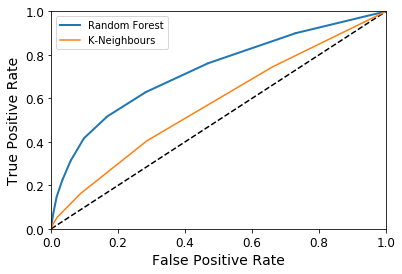

0.7269075454498026
0.5755508847031224
[[17578  1113]
 [ 3599  1710]]
[[17048  1643]
 [ 4446   863]]


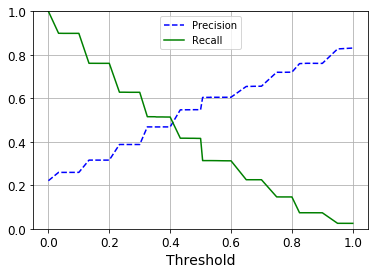

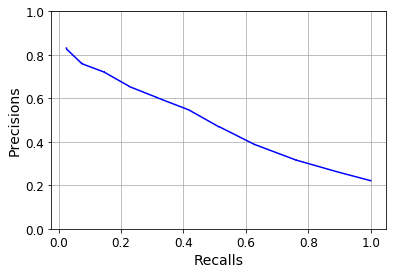

0.31590056285178236
0.761160293840648
[0.71110185 0.72151635 0.71979167 0.71744113 0.70931444]
0.7158330890570641
{'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


array([1, 1, 1, ..., 1, 1, 1])

In [27]:
####################################
## SECOND PART OF THE ASSIGNMENT ##
##################################

# - Cross-validation with 5-folds
#Did you get different results compared to the 4-fold case?

# Step 1, First fit the model on RandomForest and the KNNClassifier

# Random Forest

from sklearn.ensemble import RandomForestClassifier

rand_forest_reg = RandomForestClassifier()
rand_forest_reg.fit(credit_prepared, credit_labels)

# Now that the model is prepared, let's evaluate it on the training set

credit_predict_rand_forest = rand_forest_reg.predict(credit_prepared)

# Next, get the scores

from sklearn.model_selection import cross_val_predict

# This gives us the continuous predictions
credit_labels_probas_forest = cross_val_predict(rand_forest_reg, credit_prepared, credit_labels, cv = 5,
                                        method = "predict_proba") # Basically, y_probas_forest

# But, to plot ROC curve, you need scores, not probabilities. A simple solution is to use the positive class's
# probability as the score

credit_scores_forest = credit_labels_probas_forest[:, 1] # score = proba of positive class
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(credit_labels, credit_scores_forest)

###################################

# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_reg = KNeighborsClassifier()
knn_reg.fit(credit_prepared, credit_labels)

# Now that the model is prepared, let's evaluate it on the training set

credit_predict_knn = knn_reg.predict(credit_prepared)

# Next, get the scores

from sklearn.model_selection import cross_val_predict

# This gives us the continuous predictions
credit_labels_probas_neigh = cross_val_predict(knn_reg, credit_prepared, credit_labels, cv = 5,
                                        method = "predict_proba") # Basically, y_probas_neigh

# But, to plot ROC curve, you need scores, not probabilities. A simple solution is to use the positive class's
# probability as the score

credit_scores_neigh = credit_labels_probas_neigh[:, 1] # score = proba of positive class
#fpr_forest, tpr_forest, thresholds_neigh = roc_curve(credit_labels, credit_labels_probas_neigh)

# Step 2, Create ROC and choose the threshold

from sklearn.metrics import roc_curve

# Random Forest

fpr_forest, tpr_forest, thresholds_forest = roc_curve(credit_labels, credit_scores_forest)

# KNN

fpr_neigh, tpr_neigh, thresholds_neigh = roc_curve(credit_labels, credit_scores_neigh)

# Define the plot_roc_curve function

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Now we are ready to plot the ROC curve

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr_neigh, tpr_neigh, label = "K-Neighbours")
plt.legend(loc = "upper left")
plt.show()

# Step 3, calculaute the AUC and choose the best model

from sklearn.metrics import roc_auc_score

roc_auc_rand_forest = roc_auc_score(credit_labels, credit_scores_forest)

roc_auc_knn = roc_auc_score(credit_labels, credit_scores_neigh)

print(roc_auc_rand_forest) # 0.6380577834123794

print(roc_auc_knn) # 0.5909262552582235

# Therefore, choose the Random Forest Regressor since it has the highest AUC

# Get the confusion matrix

from sklearn.metrics import confusion_matrix

# Random Forest

# Need to get binary predictions
credit_labels_train_pred_forest = cross_val_predict(rand_forest_reg, credit_prepared, credit_labels, cv = 5)

#print(confusion_matrix(credit_labels, credit_labels_probas_forest))

print(confusion_matrix(credit_labels, credit_labels_train_pred_forest))

"""
confusion_matrix(credit_labels, credit_labels_train_pred_forest)
[[17593  1098]
 [ 3635  1674]]
"""

#########################################

# KNN

# Need to get binary predictions

credit_labels_train_pred_forest_neigh = cross_val_predict(knn_reg, credit_prepared, credit_labels, cv = 5)

print(confusion_matrix(credit_labels, credit_labels_train_pred_forest_neigh))

"""
print(confusion_matrix(credit_labels, credit_labels_train_pred_forest_neigh))
[[17048  1643]
 [ 4446   863]]
"""

# Look at the Precision Recall curve

# Choose a threshold

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(credit_labels, credit_scores_forest)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper center")
    plt.ylim([0, 1])
    plt.grid(True)

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


# Let's print precision vs recall


def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b")
    plt.xlabel("Recalls")
    plt.ylabel("Precisions")
    plt.ylim([0, 1])
    plt.grid(True)
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

# Let's choose Recall of 73% 

credit_train_pred_thres = (credit_scores_forest > 0.13)

from sklearn.metrics import precision_score, recall_score

print(precision_score(credit_labels, credit_train_pred_thres))

print(recall_score(credit_labels, credit_train_pred_thres))


# Get mean accuracy score for the Forest with CV = 5

from sklearn.model_selection import cross_val_score

forest_cross_val_score = cross_val_score(rand_forest_reg, credit_prepared, credit_train_pred_thres, cv = 5, scoring = "accuracy")

#neigh_cross_val_score = cross_val_score(knn_reg, credit_prepared, credit_labels, cv = 4, scoring = "accuracy")

print(forest_cross_val_score)

print(np.average(forest_cross_val_score)) # Actual accuracy for the training set.
#print(forest_cross_val_score)

# Let's turn boolean data into numerical

credit_train_pred_thres = credit_train_pred_thres.astype(int)

credit_train_pred_thres

# Step 4, run grid search for the RandomForestClassifier

#credit_train_pred_thres = credit_train_pred_thres.astype(int)

from sklearn.model_selection import GridSearchCV

n_estimators = [3, 4, 6, 7, 10, 20, 50, 100]

param_grid_forest = {'n_estimators' : n_estimators}

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid_forest, cv = 5, scoring='neg_mean_squared_error', refit = True)

grid_search.fit(credit_prepared, credit_train_pred_thres)

forest_best_params_ = grid_search.best_params_

forest_best_estimators_ = grid_search.best_estimator_

print(forest_best_params_)

print(forest_best_estimators_)

# Best model is the following
"""
{'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
"""

# Step 5, test the model

final_model = grid_search.best_estimator_

credit_X_test = strat_test_set.drop("default payment next month", axis = 1)
credit_y_test = strat_test_set["default payment next month"].copy()

# credit_X_test drop the 

#credit_X_test_prepared = num_pipeline.transform(credit_X_test)

final_predictions = final_model.predict(credit_X_test)

final_predictions

In [28]:
# Check the model accuracy

from sklearn.metrics import accuracy_score

print(accuracy_score(credit_y_test, final_predictions))

# Calculate the model RMSE

from sklearn.metrics import mean_squared_error

final_model_mse = mean_squared_error(credit_y_test, final_predictions)
final_model_rmse = np.sqrt(final_model_mse)
print(final_model_rmse)

0.2225
0.8817596044274199


#### Conclusions?

Explain your results and choices

In [29]:
# 1) Explain why Random Forest over the KNN

# The main reason why we choose to work with the Random Forest Classifier is because it has a greater AUC
# compared to the KNN Classifier. Therefore, Random Forest Classifier has a higher True Positive Rate compared
# to the KNN Regression

# 2) Explain why accuracy is different between the training and test sets
# The deacrease in accuracy (training set has a higher accuracy compared to the test set) is due to the change in
# threshold. Since we changed the threshold, we decided to have higher Recall and lower Precision. This means that
# we have a lot more of False Positive values which results in a lower accuracy rate.

# 3) As we increased the number of folds from 4 to 5, our accuracy on the test set has decreased tremendously
# and RMSE increasesd. Therefore, as CV increased from 4 to 5, our model underfits the data. Further analysis is
# required

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

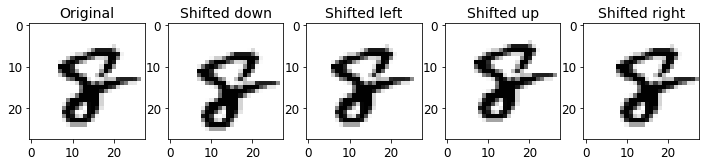

In [ ]:
# WORK GOES HERE

### Part 1 ###

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
### PART 2 ###


from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

### PART 3 ###

X, y = mnist["data"], mnist["target"]

### PART 4 ###

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
### PART 5 ###

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### PART 6 ###

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### PART 7 ###

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

### PART 8 ###

from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

#plot_digit(shift_digit(some_digit, 5, 1, new=100))

### PART 9 ###

image = X_train[1000]
shifted_image_down = shift_image(image, 0, 1)
shifted_image_left = shift_image(image, -1, 0)
shifted_image_up = shift_image(image, 0, -1)
shifted_image_right = shift_image(image, 1, 0)

#plt.figure(figsize=(12,3))
plt.figure(figsize=(12,3))
plt.subplot(151)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
### PART 10 ###

from sklearn.neighbors import KNeighborsClassifier

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

### PART 11 ###

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

### PART 12 ###


from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

### PART 13 ###

knn_clf = KNeighborsClassifier(**grid_search.best_params_)

### PART 14 ###

knn_clf.fit(X_train_augmented, y_train_augmented)

### PART 15 ###

y_pred = knn_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


### Conclusions


<pre> We get better accuracy as per the github.</pre>